In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

In [4]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
from matplotlib.axis import datetime
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os
import time 
for dir, _,filenames in os.walk('/content/drive/MyDrive/New dataset'):
   for filename in filenames:
    print(os.path.join(dir,filename))
    img = cv.imread(os.path.join(dir,filename),0)
    edges = cv.Canny(img,224,224)
    x=plt.subplot(122),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    test= plt.figure()
    plt.show() 
    if(dir=='/content/drive/MyDrive/New dataset/training/Fracture'):
     plt.imsave('/content/drive/MyDrive/Modified dataset/training /fracture /{}.jpg'.format(datetime.datetime.now().strftime("%d.%m.%Y-%H_%M_%S_%f")),img)
    elif(dir=='/content/drive/MyDrive/New dataset/training/Non-Fracture'):
      plt.imsave('/content/drive/MyDrive/Modified dataset/training /non_fracture /{}.jpg'.format(datetime.datetime.now().strftime("%d.%m.%Y-%H_%M_%S_%f")),img)
    elif(dir=='/content/drive/MyDrive/New dataset/validation/Fracture'):
        plt.imsave('/content/drive/MyDrive/Modified dataset/validation/fracture/{}.jpg'.format(datetime.datetime.now().strftime("%d.%m.%Y-%H_%M_%S_%f")),img)
    elif(dir=='/content/drive/MyDrive/New dataset/validation/Non-Fracture'):
       plt.imsave('/content/drive/MyDrive/Modified dataset/validation/non_fracture/{}.jpg'.format(datetime.datetime.now().strftime("%d.%m.%Y-%H_%M_%S_%f")),img)

In [5]:

IMAGE_SIZE = [224,224]
train_path='/content/drive/MyDrive/Modified dataset/training '
valid_path='/content/drive/MyDrive/Modified dataset/validation'

In [ ]:
import os 
for dir, _,filenames in os.walk('/content/drive/MyDrive/Modified dataset'):
  for filename in filenames:
    print(os.path.join(dir,filename))

In [7]:
vgg =VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 3s 0us/step


In [8]:
for layer in vgg.layers:
    layer.trainable = False

In [9]:
folders = glob('/content/drive/MyDrive/Modified dataset/training /*')

In [10]:
folders

['/content/drive/MyDrive/Modified dataset/training /fracture ',
 '/content/drive/MyDrive/Modified dataset/training /non_fracture ']

In [11]:
x = Flatten()(vgg.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

In [13]:
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

In [15]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Modified dataset/training ',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 500 images belonging to 2 classes.


In [18]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Modified dataset/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 194 images belonging to 2 classes.


In [34]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50, 
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-34-9f11e7683361>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
16/16 [==============================] - 501s 31s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1444 - val_accuracy: 0.9536
Epoch 2/50
16/16 [==============================] - 17s 1s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1801 - val_accuracy: 0.9485
Epoch 3/50
16/16 [==============================] - 17s 1s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1245 - val_accuracy: 0.9639
Epoch 4/50
16/16 [==============================] - 17s 1s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1868 - val_accuracy: 0.9485
Epoch 5/50
16/16 [==============================] - 17s 1s/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1586 - val_accuracy: 0.9536
Epoch 6/50
16/16 [==============================] - 18s 1s/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.1611 - val_accuracy: 0.9536
Epoch 7/50
16/16 [==============================] - 17s 1s/step - loss: 9.0524e-04 - accuracy: 1.0000 - val_loss: 0.1498 - val_accuracy: 0.9536
Epoch 8/50
16/

In [ ]:
from keras.models import load_model
model.save('/content/drive/MyDrive/Model/vgg16(1).hdf5')

In [19]:
from tensorflow.keras.models import load_model
from  tensorflow.keras.preprocessing import image
model=load_model('/content/drive/MyDrive/Model/vgg16(1).hdf5')

In [20]:
test1_set = test_datagen.flow_from_directory('/content/drive/MyDrive/New dataset/test (1)',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 25 images belonging to 2 classes.


In [21]:
model.evaluate(test1_set)

1/1 [==============================] - 10s 10s/step - loss: 0.6243 - accuracy: 0.8400


[0.6242541074752808, 0.8399999737739563]

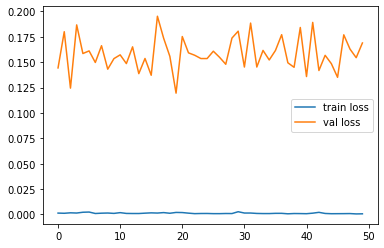

<Figure size 432x288 with 0 Axes>

In [35]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

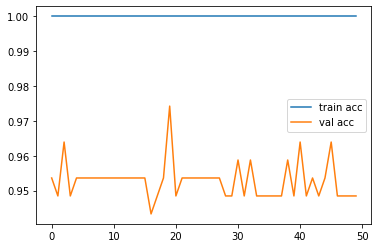

<Figure size 432x288 with 0 Axes>

In [36]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [23]:
y_pred = model.predict(test1_set)

1/1 [==============================] - 1s 764ms/step


In [24]:
y_pred

array([[9.99933958e-01, 6.60707883e-05],
       [3.01581668e-03, 9.96984184e-01],
       [4.78805780e-01, 5.21194279e-01],
       [9.99786079e-01, 2.13948340e-04],
       [7.53345609e-01, 2.46654391e-01],
       [9.99999762e-01, 2.75882769e-07],
       [9.74366188e-01, 2.56337915e-02],
       [5.67146778e-01, 4.32853192e-01],
       [1.00000000e+00, 3.32220900e-08],
       [1.61306129e-03, 9.98386979e-01],
       [1.09811954e-01, 8.90188038e-01],
       [7.81476721e-02, 9.21852291e-01],
       [6.26005558e-03, 9.93739963e-01],
       [9.99976516e-01, 2.35365442e-05],
       [9.99671459e-01, 3.28526017e-04],
       [1.86179668e-01, 8.13820362e-01],
       [9.99951363e-01, 4.86650861e-05],
       [9.99490619e-01, 5.09331992e-04],
       [1.86179668e-01, 8.13820362e-01],
       [4.26761620e-02, 9.57323909e-01],
       [1.77213773e-02, 9.82278585e-01],
       [9.98478591e-01, 1.52143463e-03],
       [9.75871027e-01, 2.41289772e-02],
       [4.08694267e-01, 5.91305733e-01],
       [1.606414

In [25]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1])

In [26]:
from tensorflow.keras.models import load_model
from  tensorflow.keras.preprocessing import image

In [27]:
img=image.load_img('/content/drive/MyDrive/New dataset/test/Fracture/image15.jpeg',target_size=(224,224))

In [28]:
x=image.img_to_array(img)
x

array([[[100., 121., 166.],
        [102., 120., 166.],
        [102., 119., 165.],
        ...,
        [ 25.,  34.,  67.],
        [ 25.,  34.,  67.],
        [ 26.,  35.,  68.]],

       [[100., 121., 166.],
        [101., 119., 165.],
        [100., 117., 163.],
        ...,
        [ 23.,  32.,  65.],
        [ 25.,  34.,  67.],
        [ 30.,  39.,  72.]],

       [[ 99., 120., 165.],
        [102., 120., 166.],
        [ 99., 116., 162.],
        ...,
        [ 32.,  41.,  74.],
        [ 22.,  31.,  64.],
        [ 26.,  35.,  68.]],

       ...,

       [[152., 178., 205.],
        [151., 161., 196.],
        [116., 131., 170.],
        ...,
        [128., 135., 179.],
        [130., 137., 181.],
        [129., 136., 180.]],

       [[145., 171., 198.],
        [151., 161., 196.],
        [116., 131., 170.],
        ...,
        [129., 136., 180.],
        [129., 136., 180.],
        [128., 135., 179.]],

       [[137., 164., 193.],
        [144., 157., 192.],
        [105., 1

In [29]:
x=x/255

In [30]:
import numpy as np
x=np.expand_dims(x,axis=0)
##img_data=preprocess_input(x)
print(x)
x.shape


[[[[0.39215687 0.4745098  0.6509804 ]
   [0.4        0.47058824 0.6509804 ]
   [0.4        0.46666667 0.64705884]
   ...
   [0.09803922 0.13333334 0.2627451 ]
   [0.09803922 0.13333334 0.2627451 ]
   [0.10196079 0.13725491 0.26666668]]

  [[0.39215687 0.4745098  0.6509804 ]
   [0.39607844 0.46666667 0.64705884]
   [0.39215687 0.45882353 0.6392157 ]
   ...
   [0.09019608 0.1254902  0.25490198]
   [0.09803922 0.13333334 0.2627451 ]
   [0.11764706 0.15294118 0.28235295]]

  [[0.3882353  0.47058824 0.64705884]
   [0.4        0.47058824 0.6509804 ]
   [0.3882353  0.45490196 0.63529414]
   ...
   [0.1254902  0.16078432 0.2901961 ]
   [0.08627451 0.12156863 0.2509804 ]
   [0.10196079 0.13725491 0.26666668]]

  ...

  [[0.59607846 0.69803923 0.8039216 ]
   [0.5921569  0.6313726  0.76862746]
   [0.45490196 0.5137255  0.6666667 ]
   ...
   [0.5019608  0.5294118  0.7019608 ]
   [0.50980395 0.5372549  0.70980394]
   [0.5058824  0.53333336 0.7058824 ]]

  [[0.5686275  0.67058825 0.7764706 ]
   [0.5

(1, 224, 224, 3)

In [31]:
y=model.predict(x)
y

1/1 [==============================] - 1s 801ms/step


array([[0.9944337 , 0.00556633]], dtype=float32)

In [32]:
a=np.argmax(model.predict(x), axis=1)
a

1/1 [==============================] - 0s 16ms/step


array([0])

In [33]:
if(a==0):
    print("Fractured")
else:
    print("non fractured")

Fractured
